### Perceptron

- gradient-descent (경사하강)

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

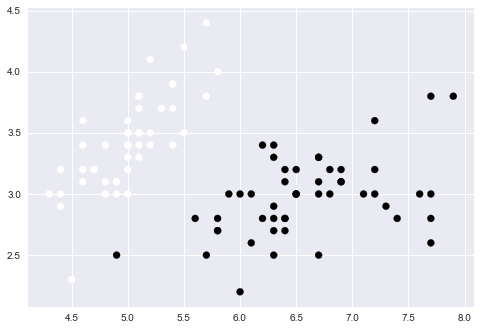

In [2]:
# load iris data
# sample:150, features:4, target:3
iris = load_iris()

# get two iris kinds among three iris kinds
idx = np.in1d(iris.target, [0, 2]) # true false incoding ( target 0 or 2 is True )
X = iris.data[idx, 0:2] # set X ( first feature and second feature )
y = iris.target[idx] # set y ( target )

# draw sctter flot
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
# sepal(꽃받침), petal(꽃잎)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data[:,:2][:5], y[:5]

(array([[ 5.1,  3.5],
        [ 4.9,  3. ],
        [ 4.7,  3.2],
        [ 4.6,  3.1],
        [ 5. ,  3.6]]), array([0, 0, 0, 0, 0]))

In [6]:
iris.data[:,:2][-5:], y[-5:]

(array([[ 6.7,  3. ],
        [ 6.3,  2.5],
        [ 6.5,  3. ],
        [ 6.2,  3.4],
        [ 5.9,  3. ]]), array([2, 2, 2, 2, 2]))

In [7]:
def plot_perceptron(n):
    model = Perceptron(n_iter=n, eta0=0.1, random_state=1).fit(X, y)        
    XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
    YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=2, edgecolor='k', c=y, cmap=cmap)
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    return model

1 - 0.5


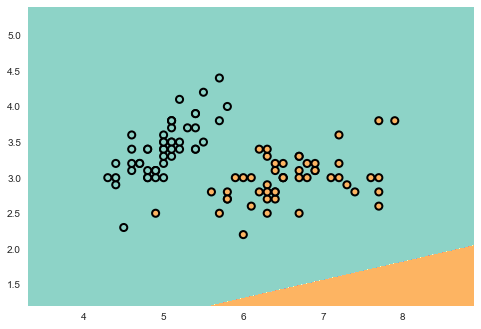

2 - 0.5


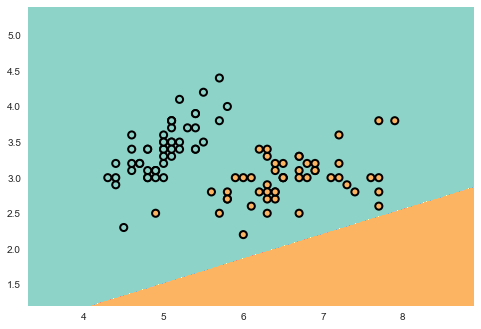

3 - 0.99


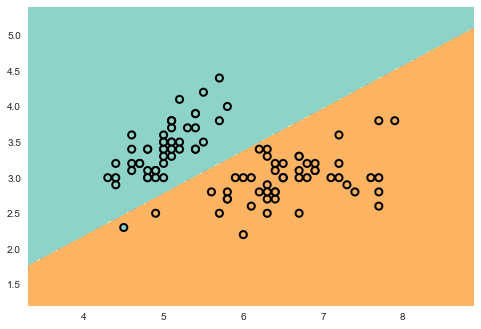

4 - 0.95


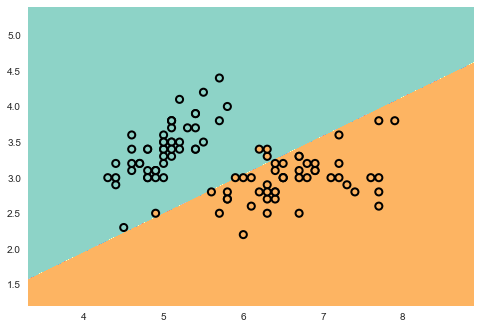

5 - 0.98


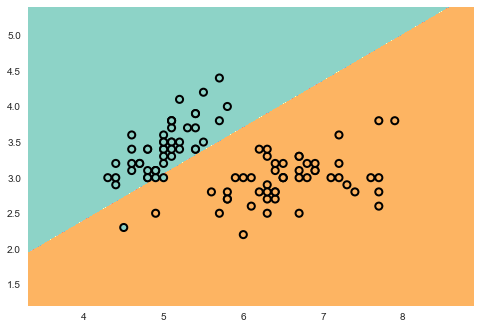

6 - 0.99


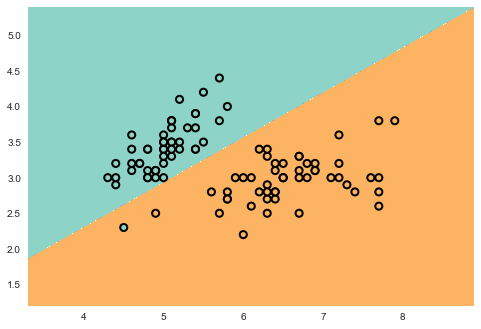

7 - 0.99


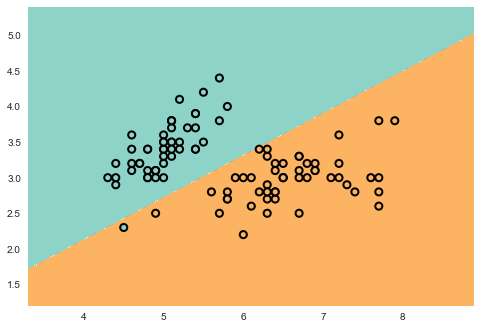

8 - 0.62


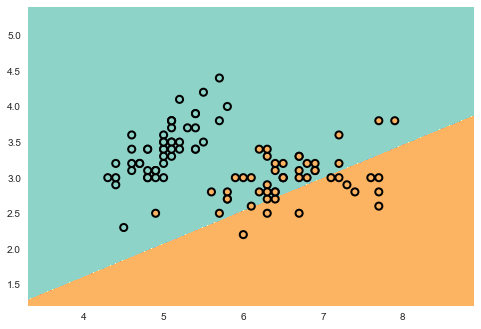

9 - 0.97


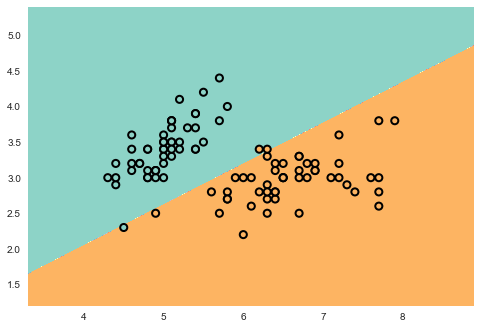

10 - 0.97


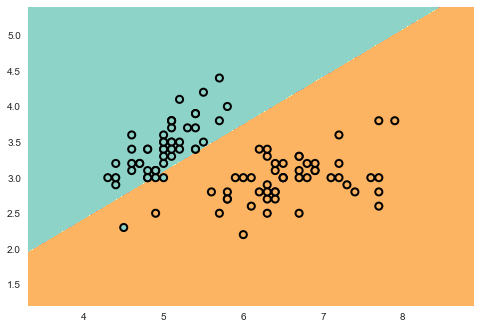

11 - 0.95


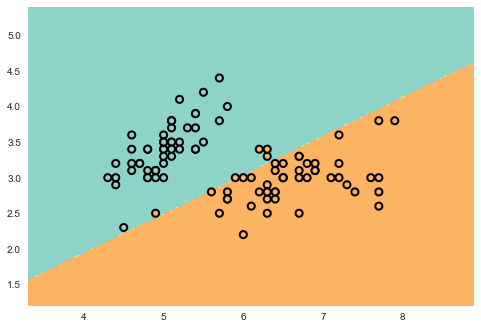

12 - 0.99


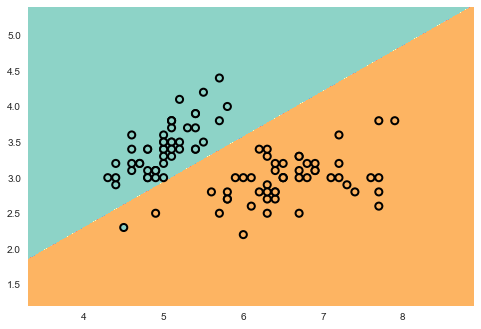

13 - 0.85


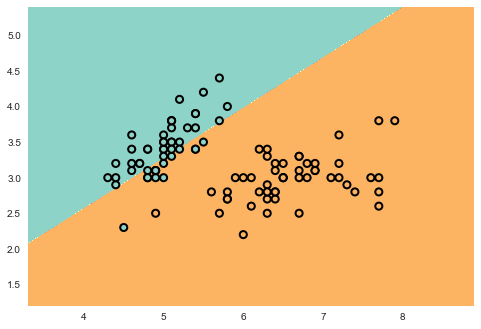

14 - 0.85


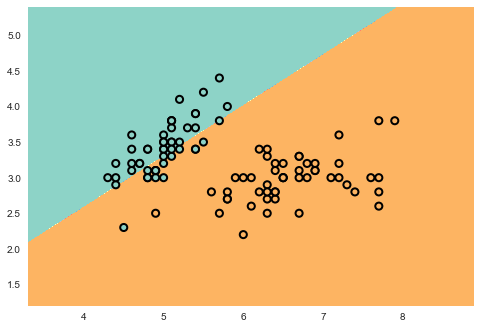

15 - 0.99


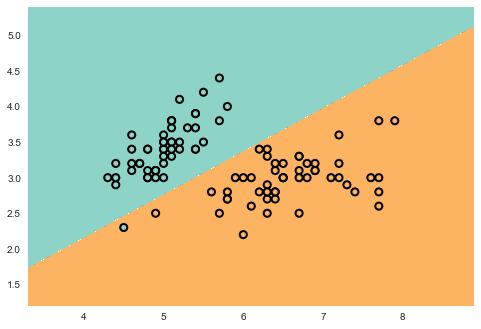

16 - 0.99


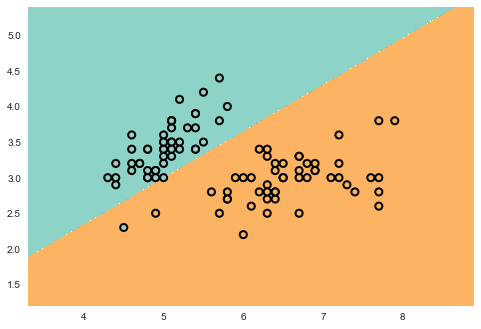

17 - 0.98


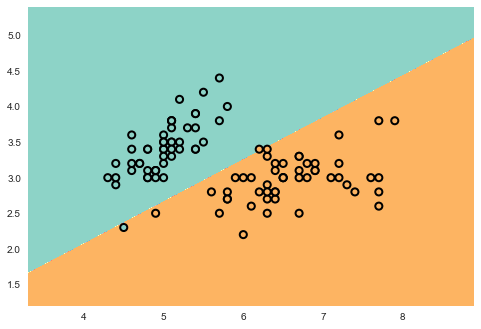

18 - 0.99


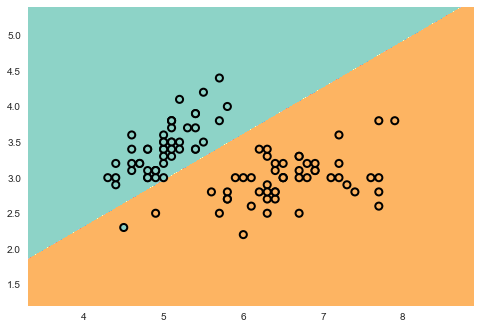

19 - 0.97


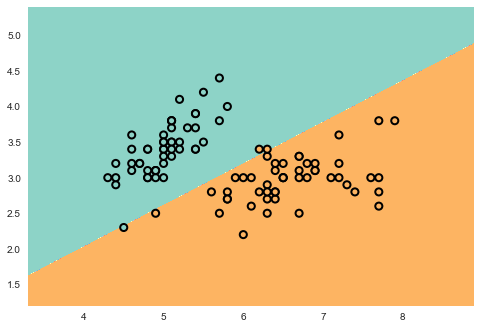

In [8]:
for n in range(1, 20):
    model = plot_perceptron(n)
    y_pred = model.predict(X)
    print(n, end=" - ")
    print(accuracy_score(y_pred, y))
    plt.show()

- SGD(Stochastic Gradient Descent) 확률론적 경사하강